# Data Quality with DeepChecks

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../save_data/ames_tab.csv')

In [3]:
df.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,property,Drug
0,21.165481,15.890359,0.0,0.0,34.747536,2.633113,5.266226,34.747536,1.336444,4.235114,...,342.064057,9.501779,1331.0,55.0,152.0,192.0,7.833333,5.500000,1,O=[N+]([O-])c1ccc2ccc3ccc([N+](=O)[O-])c4c5ccc...
1,18.906262,13.884794,0.0,0.0,31.449179,2.607123,5.214247,31.449179,1.367356,4.123629,...,301.110279,7.923955,970.0,48.0,136.0,172.0,5.861111,4.861111,1,O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2
2,41.909982,27.436902,0.0,0.0,68.986805,2.703846,5.287332,68.986805,1.379736,4.914620,...,646.116486,9.501713,8149.0,118.0,312.0,407.0,13.388889,10.305556,0,O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...
3,7.289847,7.483711,0.0,0.0,12.806544,2.074313,4.148627,12.806544,1.164231,3.219608,...,157.059974,8.725554,188.0,10.0,42.0,42.0,5.472222,2.833333,1,[N-]=[N+]=CC(=O)NCC(=O)NN
4,7.249407,6.976306,0.0,0.0,11.945822,2.267184,4.534368,11.945822,1.194582,3.197666,...,138.017775,11.501481,116.0,12.0,46.0,51.0,4.333333,2.361111,1,[N-]=[N+]=C1C=NC(=O)NC1=O


In [4]:
df_copy = df[df.columns[:-1]].copy()

In [5]:
# remove columns with all null values
df_copy.dropna(axis=1, how='all', inplace=True)

In [6]:
df_copy.describe()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,property
count,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,...,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000
mean,12.799813,10.890535,0.131217,0.149217,21.169820,2.354348,4.658381,21.169820,1.244268,3.623935,...,53.538026,242.263256,8.544627,782.987084,25.486123,85.647156,100.528854,6.135634,3.755806,0.546029
std,6.288677,4.488191,0.431622,0.480190,10.219996,0.219055,0.418718,10.219996,0.097152,0.519350,...,14.800335,107.899443,3.272340,1269.273990,16.989088,45.631956,58.248690,2.781058,1.631686,0.497911
min,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,2.000000,0.800000,1.407606,...,7.493061,41.026549,4.148446,1.000000,0.000000,2.000000,1.000000,0.750000,0.750000,0.000000
25%,8.113471,7.763360,0.000000,0.000000,13.571944,2.247466,4.472136,13.571944,1.193872,3.302156,...,42.132146,165.039006,7.004143,156.000000,13.000000,52.000000,56.000000,4.277778,2.562500,0.000000
50%,12.239595,10.597207,0.000000,0.000000,20.345386,2.375406,4.706009,20.345386,1.254820,3.699881,...,52.897500,230.071154,7.948769,442.000000,22.000000,82.000000,94.000000,5.611111,3.583333,1.000000
75%,16.647311,13.440677,0.000000,0.000000,27.475554,2.511340,4.958928,27.475554,1.311538,3.998897,...,63.974559,296.060407,9.051875,898.000000,36.000000,114.000000,137.750000,7.305556,4.611111,1.000000
max,44.256184,36.144607,4.000000,7.000000,70.836678,3.203127,6.108831,70.836678,1.465206,4.960596,...,115.108035,795.175432,78.744249,15949.000000,126.000000,320.000000,417.000000,25.388889,12.583333,1.000000


In [7]:
cat_cols = []
for col in df_copy.columns:
    if len(df_copy[col].value_counts()) < 10:
        cat_cols.append(col)

In [8]:
df_copy[cat_cols] = df_copy[cat_cols].astype('category')

In [9]:
df_train, df_test = train_test_split(df_copy, test_size=0.2, shuffle=True)
df_train.to_csv('../save_data/ames_train.csv', index=False)
df_test.to_csv('../save_data/ames_test.csv', index=False)

Here we can set up some of the parameters for the MetaData. For now, we don't have any datetime features, so we can just use the label and the categorical features we have defined earlier.

## Constructing Datasets and Validation Suite

In [10]:
label = 'property'
cat_cols = cat_cols[:-1]

In [11]:
from deepchecks.tabular import Dataset

train_ds = Dataset(df_train,cat_features=cat_cols, label=label)
test_ds = Dataset(df_test,cat_features=cat_cols, label=label)

In [12]:
from deepchecks.tabular.suites import train_test_validation

validation_suite = train_test_validation()
suite_result = validation_suite.run(train_ds, test_ds, feature_importance_timeout=1000)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_470TZWOQ80PHSUV1EQGCJEYQ8">Train Test Validat…

In [13]:
suite_result.show_in_window() # this opens up a new window that shows results with graphs and other visuals

Status,Check,Condition,More Info
✖,New Category Train Test,Ratio of samples with a new category is less or equal to 0%,"Found 11 features with ratio of new categories above threshold: {'nBase': '0.07%', 'n10Ring': '0.07%', 'SsssP': '0.07%', 'n10ARing': '0.07%', 'n10AHRing': '0.07%', 'NsssN': '0.07%', 'n10FaHRing': '0.07%', 'nHRing': '0.07%', 'NssS': '0.07%', 'n10HRing': '0.07%', 'nAHRing': '0.07%'}"
✖,Train Test Samples Mix,Percentage of test data samples that appear in train data is less or equal to 10%,Percent of test data samples that appear in train data: 11.4%
✓,Datasets Size Comparison,Test-Train size ratio is greater than 0.01,Test-Train size ratio is 0.25
✓,Feature Label Correlation Change,Train-Test features' Predictive Power Score difference is less than 0.2,Passed for 1523 relevant columns
✓,Feature Label Correlation Change,Train features' Predictive Power Score is less than 0.7,Passed for 1523 relevant columns
✓,Feature Drift,categorical drift score < 0.2 and numerical drift score < 0.2,"Passed for 1523 columns out of 1523 columns. Found column ""C3SP3"" has the highest categorical drift score: 0.04 Found column ""AATS1dv"" has the highest numerical drift score: 0.07"
✓,Label Drift,categorical drift score < 0.15 and numerical drift score < 0.15 for label drift,Label's drift score Cramer's V is 0
✓,New Label Train Test,Number of new label values is less or equal to 0,Found 0 new labels in test data: []
✓,String Mismatch Comparison,No new variants allowed in test data,No relevant columns to check were found
✓,Multivariate Drift,Drift value is less than 0.25,"Found drift value of: 0.02, corresponding to a domain classifier AUC of: 0.51"


Status,Condition,More Info
✖,Ratio of samples with a new category is less or equal to 0%,"Found 11 features with ratio of new categories above threshold: {'nBase': '0.07%', 'n10Ring': '0.07%', 'SsssP': '0.07%', 'n10ARing': '0.07%', 'n10AHRing': '0.07%', 'NsssN': '0.07%', 'n10FaHRing': '0.07%', 'nHRing': '0.07%', 'NssS': '0.07%', 'n10HRing': '0.07%', 'nAHRing': '0.07%'}"


,# New Categories,Ratio of New Categories,New Categories Names
Feature Name,,,
nBase,1,0.07%,[7.0]
n10Ring,1,0.07%,[2.0]
SsssP,1,0.07%,[-1.3316512345679012]
n10ARing,1,0.07%,[2.0]
n10AHRing,1,0.07%,[2.0]


Status,Condition,More Info
✖,Percentage of test data samples that appear in train data is less or equal to 10%,Percent of test data samples that appear in train data: 11.4%


Status,Condition,More Info
✓,Test-Train size ratio is greater than 0.01,Test-Train size ratio is 0.25


,Train,Test
Size,5822,1456


Status,Condition,More Info
✓,Train-Test features' Predictive Power Score difference is less than 0.2,Passed for 1523 relevant columns
✓,Train features' Predictive Power Score is less than 0.7,Passed for 1523 relevant columns


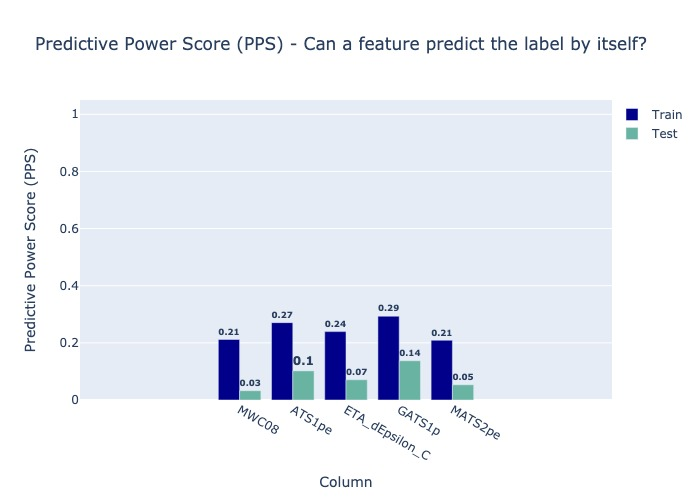

Status,Condition,More Info
✓,categorical drift score < 0.2 and numerical drift score < 0.2,"Passed for 1523 columns out of 1523 columns. Found column ""C3SP3"" has the highest categorical drift score: 0.04 Found column ""AATS1dv"" has the highest numerical drift score: 0.07"


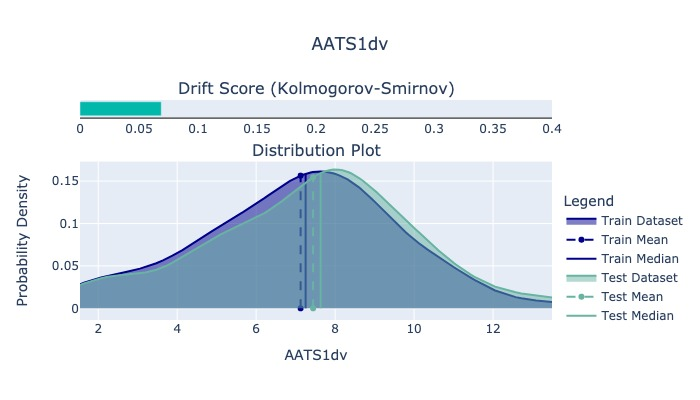

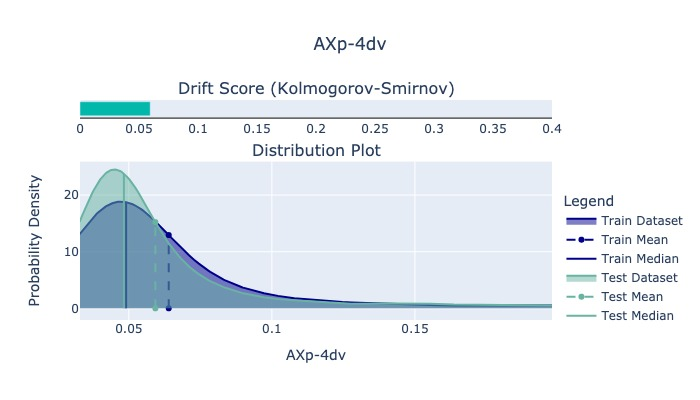

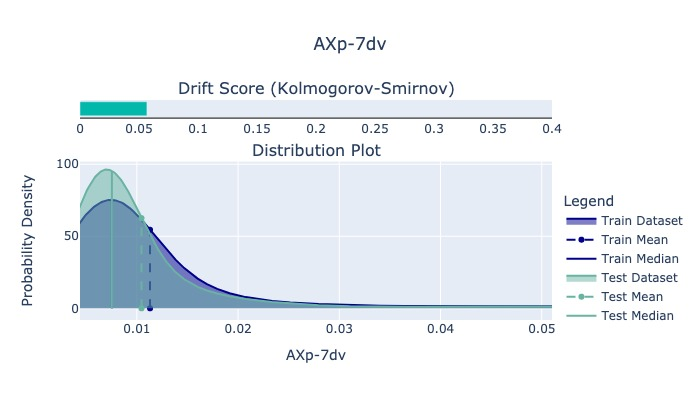

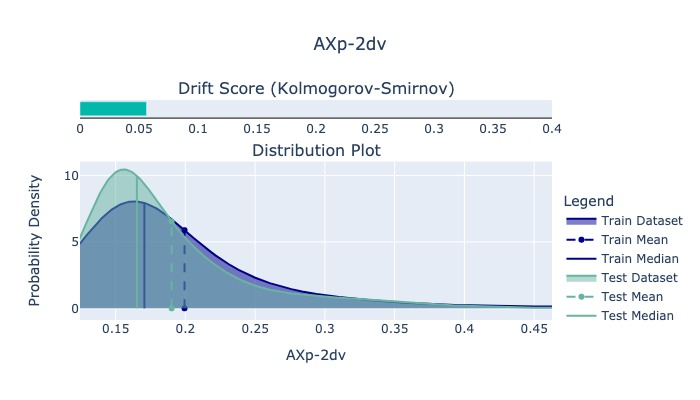

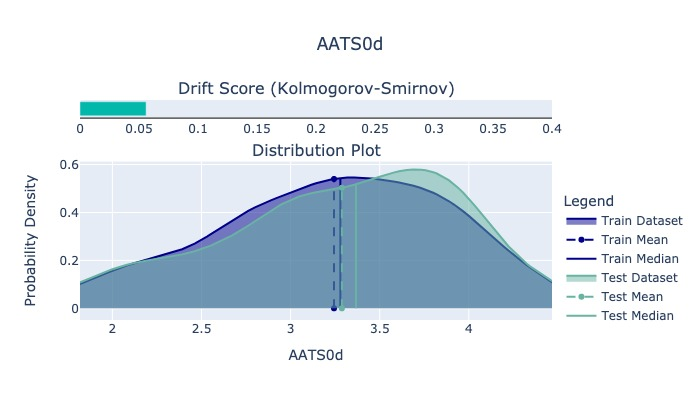

Status,Condition,More Info
✓,categorical drift score < 0.15 and numerical drift score < 0.15 for label drift,Label's drift score Cramer's V is 0


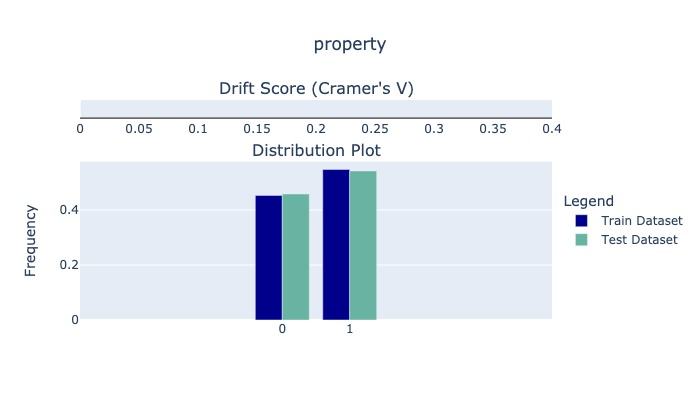

Check,Reason
Date Train Test Leakage Duplicates,DatasetValidationError: Dataset does not contain a datetime. see Dataset docs
Date Train Test Leakage Overlap,DatasetValidationError: Dataset does not contain a datetime. see Dataset docs
Index Train Test Leakage,DatasetValidationError: Dataset does not contain an index. see Dataset docs
New Label Train Test,Nothing found
String Mismatch Comparison,Nothing found
Multivariate Drift,Nothing found


In [14]:
suite_result.show_not_interactive()

## Using DeepChecks for Calculating Feature Importance

DeepChecks also comes with the capability for calculating feature importance using a given model, either with a built-in feature importance from the model, or from the DeepChecks suite.

In [15]:
from xgboost import XGBClassifier

y_train = np.array(df_train.property)
X_train = df_train.drop(columns='property')

model = XGBClassifier(tree_method='hist', enable_categorical=True).fit(X_train, y_train)

In [16]:
from deepchecks.tabular.checks import UnusedFeatures
from deepchecks.tabular.feature_importance import calculate_feature_importance

check = UnusedFeatures()

feature_importance = calculate_feature_importance(model, train_ds)

check.run(train_ds, model, feature_importance=feature_importance)

In [17]:
check.run(test_ds, model, feature_importance=feature_importance)